In [1]:
import pandas as pd
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
import collections

In [2]:
with open('Data.txt') as f:
    input = f.readlines()
for i in range(len(input)):
    input[i] = float(input[i].replace("\n",""))

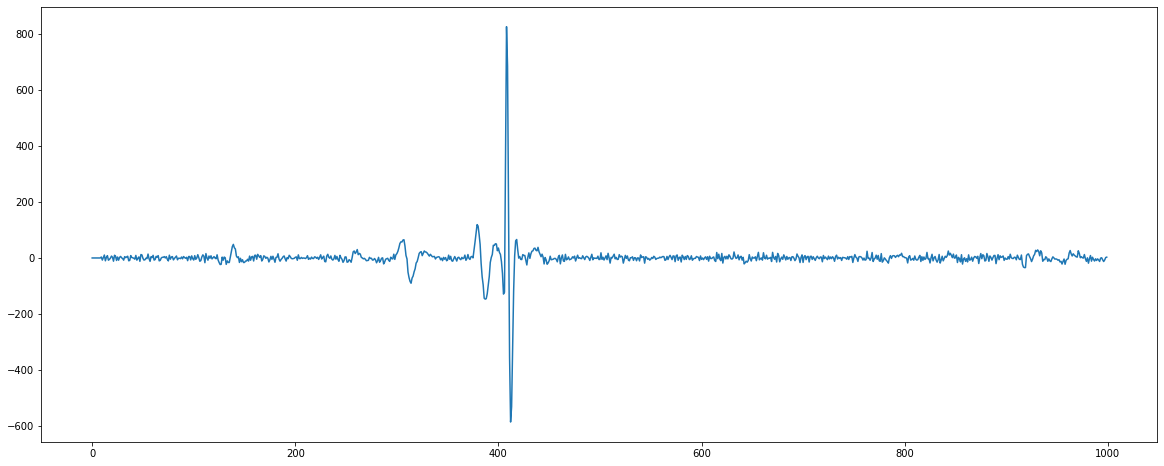

In [3]:
plt.plot(input[:1000])
plt.show()

In [39]:
def detectMUAP(inputData, N):
    inputData = np.array(inputData)
    absolute = np.absolute(inputData)
    plt.subplot(311)
    plt.plot(absolute[:1000])
    threshold = 3*np.std(absolute[500:800])
    print("Threshold is",round(threshold,2))
    movingAverage = getMovingAverage(absolute,N)
    plt.subplot(312)
    plt.plot(movingAverage[:1000])
    aboveThreshold = np.copy(movingAverage)
    aboveThreshold[aboveThreshold<threshold] = 0
    plt.subplot(313)
    plt.plot(aboveThreshold[:1000])
    detectedMUAPs = []
    i=0
    while i <len(aboveThreshold):
        if aboveThreshold[i] == 0:
            i+=1
            continue
        indices = []
        indices.append(i)
        i+=N
        indices.append(min([i-1,len(aboveThreshold)-1]))
        while i<len(aboveThreshold) and aboveThreshold[i]!=0:
            indices.append(i)
            i+=1
        detectedMUAPs.append((indices[0],indices[-1]))
        i+=1
#     print(detectedMUAPs)
    templates=[]
    for wave in detectedMUAPs:
        match = False
        wavePeak = int(np.argmax(inputData[wave[0]:(wave[1]+1)]) - N/2 )
        waveTemplate = inputData[(wave[0]+wavePeak):(wave[0]+wavePeak+N)]
        for template in templates:
            if wavesMatch(waveTemplate,template[0],12.65**5):
                match=True
                template[1].append(wave[0]+wavePeak + N/2)
                newTemplate=[0]*len(template[0])
                for temp in template[1]:
                    newTemplate += inputData[int(temp-N/2):int(temp-N/2+N)]
                newTemplate /= len(template[1])
                template[0] = newTemplate
                break
        if (not match):
            templates.append([waveTemplate,[wave[0]+wavePeak + N/2]])
                                    
    return templates
    

def wavesMatch(wave, template, threshold):
    return np.sum(np.square(wave-template))<threshold
    
def getMovingAverage(inputSignal, window):
    moving_averages = []
    i=0
    while i < len(inputSignal) - window + 1:
  
        window_average = round(np.sum(inputSignal[
          i:i+window]) / window, 5)
      
        moving_averages.append(window_average)
      
        i += 1
  
    return np.array(moving_averages)

Threshold is 15.03


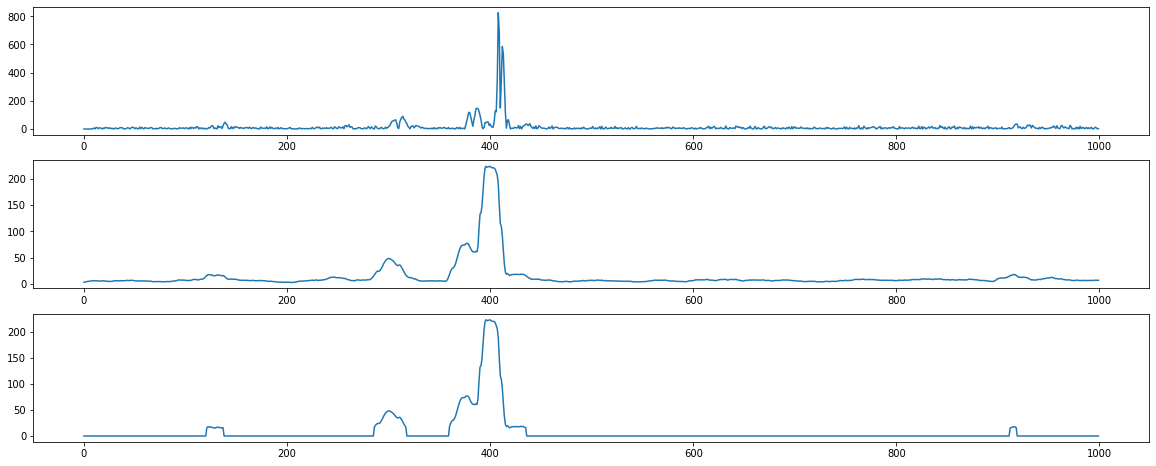

In [40]:
templates = detectMUAP(input, 20)

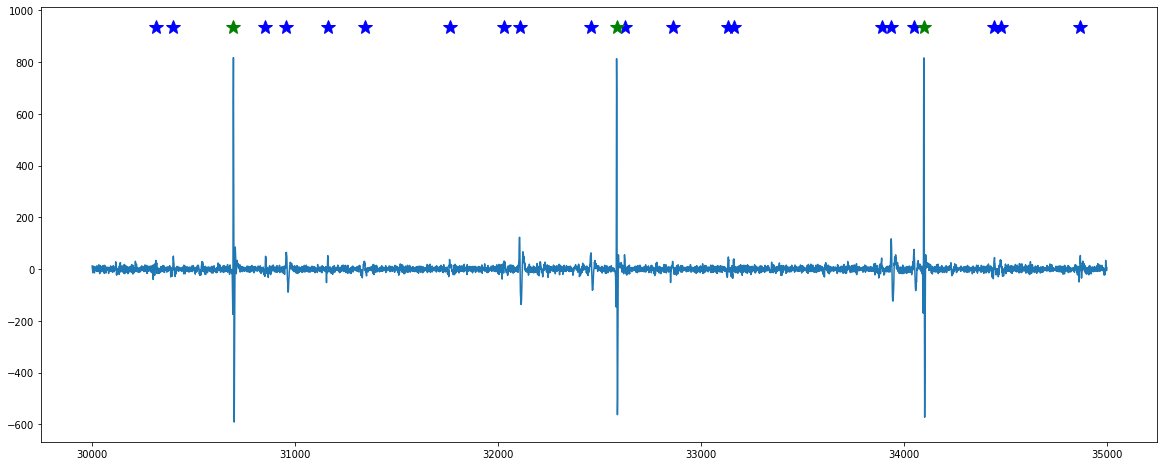

In [41]:
plt.plot(range(30000,35000),input[30000:35000])
colors = ['b','g','r','c','m','y']
i=0
for template in templates:
    peaks = np.array(template[1])
    peaks = peaks[(peaks > 30000) & (peaks<35000)]
    plt.plot(peaks, [max(input)*1.1]*len(peaks), marker="*", linestyle="",color=colors[i], markersize=15)
    i+=1
plt.show()

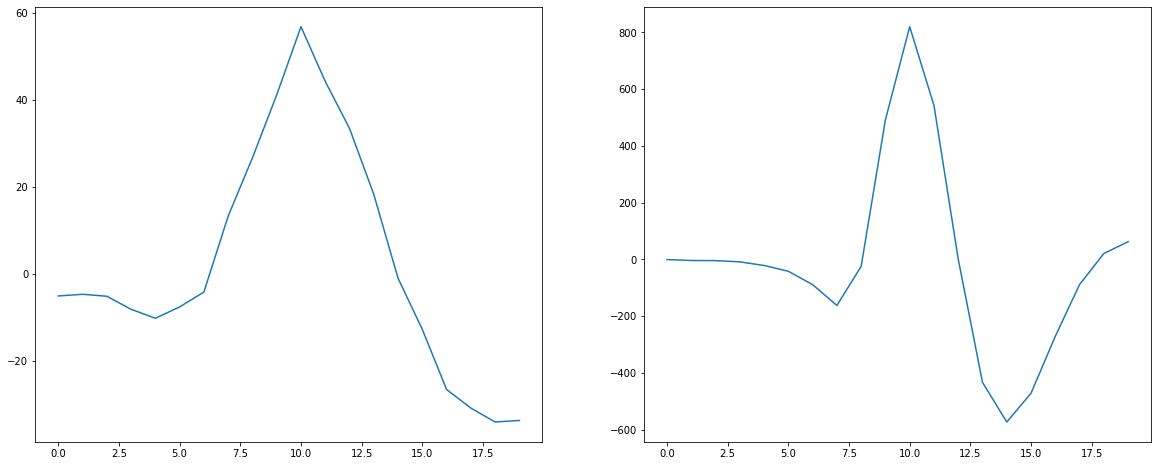

In [42]:
for i in range(len(templates)):
    plt.subplot(int((len(templates)+1)/2),2,i+1)
    plt.plot(templates[i][0])